# Logistic-Regression-in-Python
Applied Logistic Regression (Supervised learning model) on Titanic: Machine Learning from Disaster Data-set from Kaggle

## Overview 
The following jupyter notebook contains steps I used for drawing out predictions on the survived column. Since there is a target column/ variable present, this problem gets classified as a supervised learning problem.
Steps:
1. Importing necessary libraries. (numpy, pandas, matplotlib, seaborn).
2. Reading in data.
2. Data Exploration and Visualization.
3. Feature Engineering. 
4. Construction of a predictive model( Any machine learning model in Surpervised Learning)
5. Fitting featurized data into the predictive model.
6. Drawing out predictions with test data.

## Dependencies:
* conda install numpy
* conda install pandas
* conda install scikit-learn
* conda install matplotlib


### Importing Libraries

In [11]:
# Standard libraries
import pandas as pd
import numpy as np

In [12]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading Data

In [13]:
train = pd.read_csv('../input/train.csv')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data exploration and visualization

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking for null values

In [21]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


Plotting the null values on a heatmap for better visualization

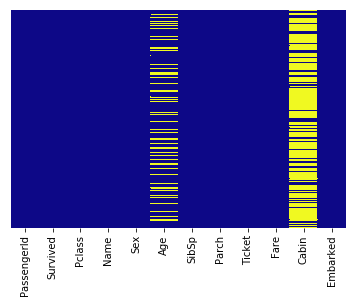

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')
# every yellow line means missing data 


* Age and Cabin columns have missing data.
*  Age column has relatively less missing data when compared to Cabin

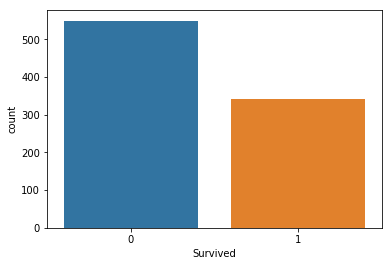

In [23]:
# First of all lets plot who survived and who didn't
sns.countplot(x = 'Survived', data = train)
# So about 580 didn't survive 
# And 320 survived

* *Dataset has a greater number rows with survived label as 0*
* *About 580+ classify as 0*
* *And 320 as 1*

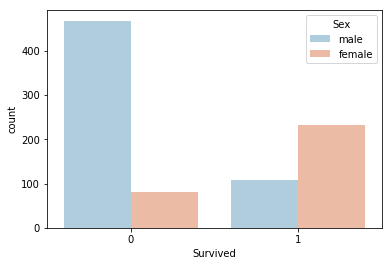

In [24]:
# Lets look at survived with a hue of gender
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette='RdBu_r')

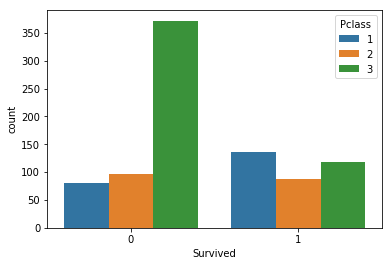

In [25]:
# Lets look at survived with a hue of Pasenger class
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

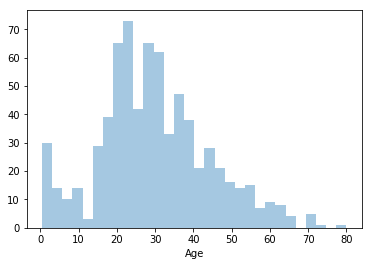

In [26]:
# Lets get an idea about the age of people in the data set
sns.distplot(train['Age'].dropna(), kde= False, bins = 30)

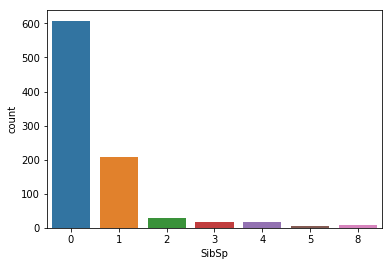

In [27]:
sns.countplot(x = 'SibSp', data = train)
# By looking at this plot, most people on board neither had  siblings / spouses aboard

In [29]:
# Another column which we haven't explored yet is the fare column
train['Fare'].mean()

32.2042079685746

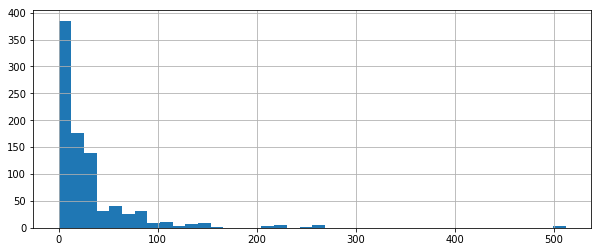

In [30]:
train['Fare'].hist( bins = 40, figsize = (10,4))
# most of the distribution is between 0 and 100 

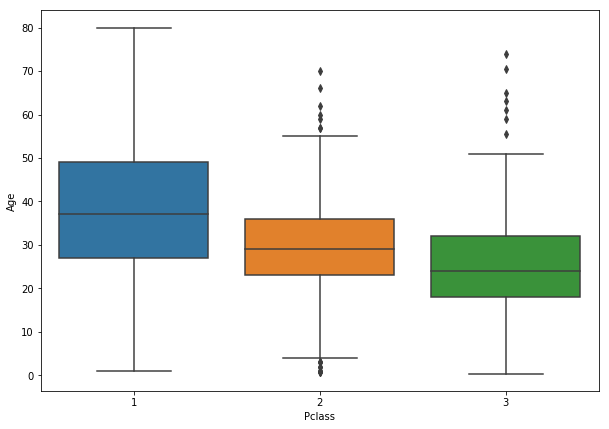

In [31]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)
# The figure shows that the Passengers in class 1 have older people 
# And younger people in lower Pclass

In [32]:
# Filling in null age values
def substitution(columns):
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 36         # approx mean value from blue box
        elif Pclass == 2:
            return 29        # approx mean value from orange box
        else:
            return 23         # approx mean value from green box  
    else:
        return Age           # is not null

In [33]:
train['Age'] = train[['Age', 'Pclass']].apply(substitution, axis = 1)

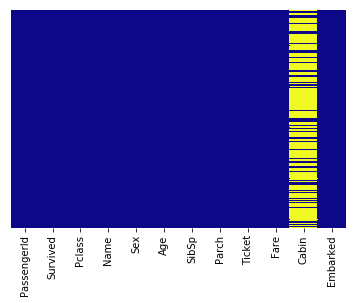

In [34]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')
# no more missing values in Age 

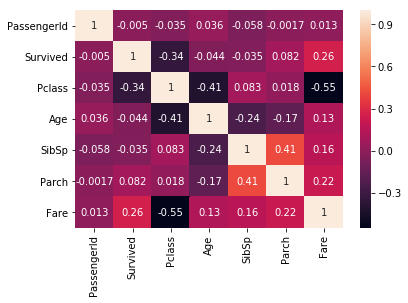

In [35]:
sns.heatmap(train.corr(), annot= True)
# Checking for correlation between columns

In [36]:
train.drop('Cabin',axis=1,inplace=True)
# there are so many missing columns in cabin
# that it seems right to drop it

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


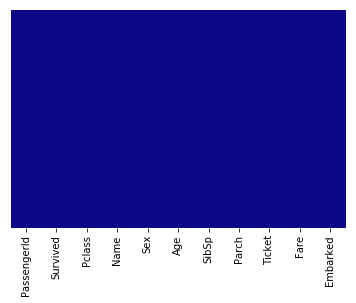

In [38]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')
# Final check for null values

In [40]:
pd.get_dummies(train['Sex']).head()
# we need to convert the sex column
# otherwise the machine learning alogorithm won't be able process the data

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [41]:
pd.get_dummies(train['Sex'], drop_first= True).head()
# now you can not feed both these columns as male and female are opposite
# and it will mess up the machine learning algorthim

,male
0,1
1,0
2,0
3,0
4,1


In [42]:
sex = pd.get_dummies(train['Sex'], drop_first= True)

In [43]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
# same process with Embarked column

In [44]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [45]:
# Since Pclass is also a categorical column
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [46]:
train = pd.concat([train, sex, embark, pclass], axis = 1)

In [47]:
train.head()
# now, we don't need sex, embarked, plcass column because we have encoded them.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [48]:
train.drop(['Sex','Embarked','Name','Ticket', 'Pclass'],axis=1,inplace=True)
# dropping columns which we are not going to use

In [49]:
train.head()
# looks perfect for our machine learning algorithm
# all data is numeric

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [50]:
# Features
X = train.drop('Survived', axis = 1)

# Target variable
y = train['Survived']

In [51]:
from sklearn.linear_model import LogisticRegression
# Supervised learning 

In [57]:
model = LogisticRegression(solver='lbfgs', max_iter= 1000)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
test = pd.read_csv('../input/test.csv')

In [68]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [70]:
test['Age'] = test[['Age', 'Pclass']].apply(substitution, axis = 1)

In [71]:
# Preparing test data according to the model
sex = pd.get_dummies(test['Sex'], drop_first= True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
pclass = pd.get_dummies(test['Pclass'],drop_first=True)

test = pd.concat([test, sex, embark, pclass], axis = 1)

test.drop(['Sex','Embarked','Name','Ticket', 'Pclass', 'Cabin'],axis=1,inplace=True)

In [72]:
test.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

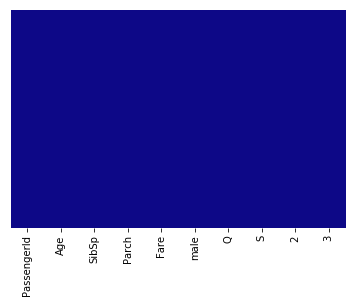

In [73]:
# Checking for null values in test
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.4 KB


In [80]:
test.fillna(value=test['Fare'].mean(), inplace= True)

In [81]:
predictions = model.predict(test)

In [84]:
d = {'PassengerId': test['PassengerId'], 'Survived': predictions}
result = pd.DataFrame(d)

In [87]:
result.to_csv('submission.csv', index= False)

In [88]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
